In [1]:
import numpy as np
from torch import nn, optim
import torch.nn.functional as F
import torch
from torch.utils.data import TensorDataset, DataLoader
from matplotlib import pyplot as plt


In [19]:
class ArithmeticOracle(nn.Module):
  def __init__(self):
    super(ArithmeticOracle, self).__init__()

    # Declare first layer
    self.fc1 = nn.Linear(2, 5)
    # And second layer
    self.fc2 = nn.Linear(5, 1)
  
  def forward(self, x):
    # Pass input through the first layer
    x = self.fc1(x)
    
    # Apply activation function
    x = F.relu(x)
    
    # Pass input through the second layer
    x = self.fc2(x)
    
    return x

In [3]:
def train(model, train_loader, test_loader, optimizer, epoch):
  # Declare the loss function
  loss_fn = nn.MSELoss()
  for batch_idx, (data, target) in enumerate(train_loader):
    # Zero the gradients
    optimizer.zero_grad()
    
    # Run a batch through the model
    output = model(data)
    
    # Compute loss
    loss = loss_fn(output, target)
                   
    #Propagate loss backwards
    loss.backward()

    # Propel the optimizer to the next step
    optimizer.step()
    
    # Print out our progress every few batches
  if epoch % 1 == 0:
    print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
  test_loss = test(model, test_loader, epoch)
  return test_loss, loss.item()/len(target)

In [4]:

def test(model, test_loader, epoch):
    test_loss = 0
    loss_fn = nn.MSELoss()
    with torch.no_grad():
        for data, target in test_loader:
            #Get input data and ground truth from data loader
            data, target = data, target

            #Run them through the model
            output = model(data)

            # Add the loss for the current batch to total loss
            test_loss += loss_fn(output, target).item()

    # Return average loss per point
    test_loss /= len(test_loader.dataset)
    return test_loss

In [5]:
# Seed the random generator
torch.manual_seed(1)

testsize = 1000

# Generate pairs of numbers between 0 and 0.5
example_input = torch.vstack([torch.rand(testsize, 2) * 0.5 ])
print("Shape of input data", example_input.shape)

# Add the number pairs to get ground truth
example_output = torch.sum(example_input, axis=1)
print("Original shape of output data", example_output.shape)

# IMPORTANT!
# Reshape the output to have the same number of dimensions as input data
example_output = example_output.reshape(testsize, 1)
print("Fixed shape of output data", example_output.shape)

Shape of input data torch.Size([1000, 2])
Original shape of output data torch.Size([1000])
Fixed shape of output data torch.Size([1000, 1])


In [20]:

# Divide the training data into training and test datasets
train_input = example_input[:-50]
train_ground_truth = example_output[:-50]
test_input = example_input[-50:]
test_ground_truth = example_output[-50:]


# Turn the data into an object that can be used for training
train_dataset = TensorDataset(train_input, train_ground_truth)
test_dataset = TensorDataset(test_input, test_ground_truth)

#Define hyperparameters
batch_size = 32
learning_rate = 0.025
momentum = 0.8


#Create PyTorch's DataLoader objects, designed for gradient descent
train_loader = torch.utils.data.DataLoader(train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=True)


In [21]:
model = ArithmeticOracle()#
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

Train Epoch: 1 [638/950 (97%)]	Loss: 0.036820
Train Epoch: 2 [638/950 (97%)]	Loss: 0.044953
Train Epoch: 3 [638/950 (97%)]	Loss: 0.056406
Train Epoch: 4 [638/950 (97%)]	Loss: 0.054116
Train Epoch: 5 [638/950 (97%)]	Loss: 0.027548
Train Epoch: 6 [638/950 (97%)]	Loss: 0.036967
Train Epoch: 7 [638/950 (97%)]	Loss: 0.024664
Train Epoch: 8 [638/950 (97%)]	Loss: 0.032527
Train Epoch: 9 [638/950 (97%)]	Loss: 0.038842
Train Epoch: 10 [638/950 (97%)]	Loss: 0.029497
Train Epoch: 11 [638/950 (97%)]	Loss: 0.020377
Train Epoch: 12 [638/950 (97%)]	Loss: 0.009334
Train Epoch: 13 [638/950 (97%)]	Loss: 0.009748
Train Epoch: 14 [638/950 (97%)]	Loss: 0.003900
Train Epoch: 15 [638/950 (97%)]	Loss: 0.002707
Train Epoch: 16 [638/950 (97%)]	Loss: 0.001329
Train Epoch: 17 [638/950 (97%)]	Loss: 0.001043
Train Epoch: 18 [638/950 (97%)]	Loss: 0.000650
Train Epoch: 19 [638/950 (97%)]	Loss: 0.000211


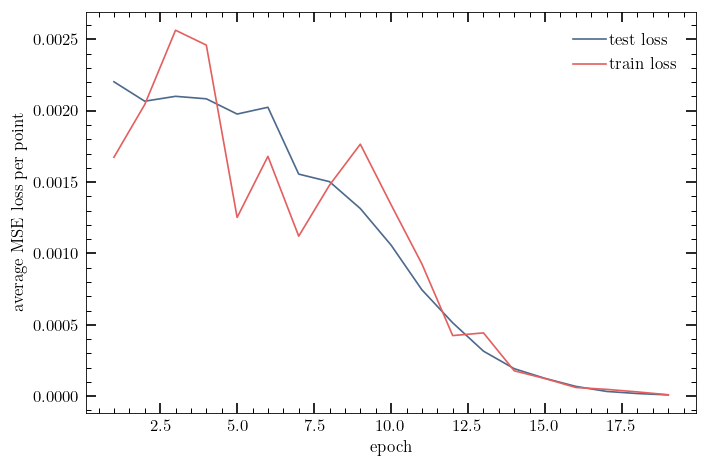

In [8]:
epochs = []
testlosses =  []
trainlosses = []
for epoch in range(1, 20):
    test_loss, train_loss = train(model, train_loader,test_loader, optimizer, epoch)
    testlosses.append(test_loss)
    trainlosses.append(train_loss)
    epochs.append(epoch)
fig, axes = plt.subplots(figsize=(6,4), dpi=120)
axes.plot(epochs, testlosses, label='test loss')
axes.plot(epochs, trainlosses, label="train loss")
axes.set(xlabel='epoch', ylabel='average MSE loss per point')
axes.legend();


In [10]:
# Have your new arithmetic oracle do some additions!

a = 0.05
b = 0.75


please_add = model(torch.Tensor([a,b]))
print(f"The oracle says {a} plus {b} equals {please_add[0]:0.0e}.")

The oracle says 0.05 plus 0.75 equals 8e-01.
